In [249]:
import gym
import numpy as np
import warnings
import random
warnings.simplefilter('ignore')

In [250]:
env = gym.make('MountainCar-v0')

In [251]:
print(f"Action Space is {env.action_space}")
print(f"Observation Space is {env.observation_space}")
print(f"Reward Range is {env.reward_range}")

Action Space is Discrete(3)
Observation Space is Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Reward Range is (-inf, inf)


In [252]:
pos = [-1.2, 0.6]

In [253]:
valid_actions=[0,1,2]

In [254]:
pos_low = pos[0]
pos_high = pos[1]

In [255]:
#want to make twenty boxes, hence will divide by 20
divs = (pos_high - pos_low)/20
x=-1.2
box_list=[]
while x<=0.6:
    box_list.append(x)
    x+=divs

In [256]:
box_list[0]=-1.3

In [257]:
observation_length=len(env.reset())
feature_length=observation_length +1
weights=np.random.randn(feature_length)

In [258]:
weight_list = [weights for x in range(len(box_list))]

In [259]:
weight_list

[array([0.88689531, 0.16645431, 0.75045678]),
 array([0.88689531, 0.16645431, 0.75045678]),
 array([0.88689531, 0.16645431, 0.75045678]),
 array([0.88689531, 0.16645431, 0.75045678]),
 array([0.88689531, 0.16645431, 0.75045678]),
 array([0.88689531, 0.16645431, 0.75045678]),
 array([0.88689531, 0.16645431, 0.75045678]),
 array([0.88689531, 0.16645431, 0.75045678]),
 array([0.88689531, 0.16645431, 0.75045678]),
 array([0.88689531, 0.16645431, 0.75045678]),
 array([0.88689531, 0.16645431, 0.75045678]),
 array([0.88689531, 0.16645431, 0.75045678]),
 array([0.88689531, 0.16645431, 0.75045678]),
 array([0.88689531, 0.16645431, 0.75045678]),
 array([0.88689531, 0.16645431, 0.75045678]),
 array([0.88689531, 0.16645431, 0.75045678]),
 array([0.88689531, 0.16645431, 0.75045678]),
 array([0.88689531, 0.16645431, 0.75045678]),
 array([0.88689531, 0.16645431, 0.75045678]),
 array([0.88689531, 0.16645431, 0.75045678]),
 array([0.88689531, 0.16645431, 0.75045678])]

In [260]:
INPUT_LAYER=len(env.reset())
EPISODES=1000
EPSILON=0.8

In [261]:
#will use this i to get the index for the weight to update

def get_state(observation):
    curr = observation[0]
    if curr == 1.2:
        return 1
    for i in range(len(box_list)-1):
        if curr >= box_list[i] and curr<box_list[i+1]:
            return i

In [263]:
def features(observations, action):
    feature_vector = np.append(observations, action)
    return feature_vector

In [264]:
def delta_q(observation,action):
    return features(observation,action)

In [265]:
def q_value(observations,action):
    index = get_state(observations)
    if index==None:
        index=0
    weights=weight_list[index]
    return np.dot(weights, features(observations,action))

In [266]:
def sample_action(observation):
    list_q=[]
    if random.random() > EPSILON:
        for action in valid_actions:
            list_q.append(q_value(observation,action))
        return np.argmax(list_q)
        
    else:
        return random.choice(valid_actions)

In [237]:
terminated=False
ACTOR=1
step_size=[]

In [267]:
def run(alpha,gamma):
    current_state, info = env.reset(seed=42)
    terminated = False
    step=0
    while terminated!=True:
        step+=1
        current_action = sample_action(current_state)
        next_state, reward, terminated, truncated, info = env.step(current_action)
        index = get_state(current_state)
        if not terminated:
            weight_list[index] = weight_list[index] + alpha*(reward + gamma*q_value(next_state,sample_action(next_state)) - 
                                                     q_value(current_state, current_action)) * delta_q(current_state, current_action)
            current_state =next_state
        else:
             weight_list[index] = weight_list[index] + alpha*(reward - q_value(current_state, current_action)) * delta_q(current_state, current_action) 
    step_size.append(step)

In [268]:
for episodes in range(100):
    run(0.1, 0.8)

In [269]:
len(step_size)

100

In [271]:
import matplotlib.pyplot as plt

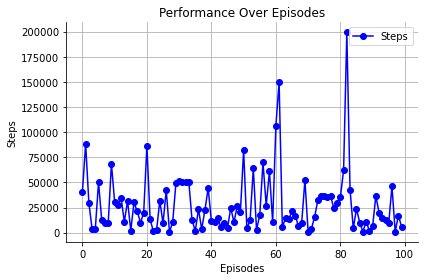

In [272]:
fig, ax = plt.subplots()
ax.plot(step_size, marker='o', color='b', label='Steps')
ax.set_xlabel('Episodes')
ax.set_ylabel('Steps')
ax.set_title('Performance Over Episodes')
ax.grid(True)
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()